1. Implement the method of moments for Hall´en’s integral equation. Use the method of moments to compute the
current distribution on a half-wave dipole. Plot the magnitude of the current along the antenna together with the
sinusoidal current model.
To accomplish this equations 3.30, 3.34, 3.35 were calculated. Then using 3.36 the current segments along the dipole is
solved using <linalg.solve> for .

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# Variable setup
eps0 = 8.854e-12                    # Vacuum permittivity
f = 300e6                           # Frequency of operation
lam = 3e8 / f                       # Wavelength

print("Wavelength: ", lam) # debug statement

k = 2 * np.pi / lam                 # Wave number
l = lam / 2                         # Antenna length

le = l/lam
print("Electrical length: ", le)

a = 0.001                           # Wire radius
idk = a/lam
print("Whatever this thing is: ", idk)
                        
N = 168                        # Maximum number of equations
points = N+1                   # Number of test functions
dz = (l / 2) / (points)             # Delta z
print("Delta z: ", dz)

equations = np.linspace(0, points, points)  # Discrete points
z = (equations - 0.5) * dz                  # Corrected midpoint calculation
print("Final point in the integration: ", z[points-1])

# Calculate R and Z
Z_pos = np.zeros((points, points), dtype=np.complex128)
Z_neg = np.zeros((points, points), dtype=np.complex128)
for m in range(points):
    for n in range(N):
        R = np.sqrt(a**2 + (z[m] - z[n])**2)
        Z_pos[m, n] = dz*np.exp(-1j * k * R) / (4 * np.pi * R)
        R = np.sqrt(a**2 + (z[m] + z[n])**2)
        Z_neg[m, n] = dz*np.exp(-1j * k * R) / (4 * np.pi * R)

# Construct impedance matrix Zmn
Zmn = Z_pos + Z_neg
row, col = Zmn.shape
print("Array size: ", row, ",", col)
print("Printing the first 5 elements of Zmn: ")
for i in range(0,5):
    print(Zmn[i])

# Define constants for solving for x
mu = 4*np.pi*1e-7 # Permeability
omega = 2 * np.pi * f
B = 1
Vi = np.sqrt(mu * eps0) * k * 2 * B / (-1j * omega * mu * eps0)
eta = 377 # Intrinsic impedance of free space

# Define cos and sin terms
cos = (1j / eta) * np.cos(k * z) # Basis function (column vector)
sin = (-1j * Vi / (2 * eta)) * np.sin(k * z) # Testing function (column vector)

# Reshape sin to be a column vector
B = sin.reshape(-1, 1)

# matrix multiplication
A = Zmn * cos

# Solve for c
c = np.linalg.solve(A, B) # Solve only if matrix is not singular

# Plot
plt.plot(N, np.abs(c))
plt.xlabel('N (Segment Index)')
plt.ylabel('Current Magnitude')
plt.title('Current Distribution on a Half-Wave Dipole')
plt.grid()
plt.show()

Wavelength:  1.0
Electrical length:  0.5
Whatever this thing is:  0.001
Delta z:  0.001488095238095238
Final point in the integration:  0.24925595238095236
Array size:  168 , 168
Printing the first 5 elements of Zmn: 
[1.84461754e-01-0.00148807j 1.84185440e-01-0.00148807j
 1.03011077e-01-0.00148803j 6.31339804e-02-0.00148794j
 4.51699016e-02-0.00148781j 3.51271935e-02-0.00148764j
 2.87273308e-02-0.00148742j 2.42938812e-02-0.00148715j
 2.10409520e-02-0.00148685j 1.85519483e-02-0.00148649j
 1.65856022e-02-0.0014861j  1.49925525e-02-0.00148566j
 1.36753961e-02-0.00148518j 1.25679049e-02-0.00148465j
 1.16234783e-02-0.00148408j 1.08083737e-02-0.00148347j
 1.00975583e-02-0.00148281j 9.47206897e-03-0.00148211j
 8.91727772e-03-0.00148137j 8.42172001e-03-0.00148058j
 7.97628334e-03-0.00147975j 7.57363351e-03-0.00147887j
 7.20780105e-03-0.00147796j 6.87387788e-03-0.00147699j
 6.56779144e-03-0.00147599j 6.28613418e-03-0.00147494j
 6.02603316e-03-0.00147385j 5.78504915e-03-0.00147272j
 5.56109778e

LinAlgError: Singular matrix

2. Addpost-processing to compute the radiation pattern of the half-wave dipole from the current distribution. Plot this
pattern together with the pattern approximations from the previous homework assignment.
The radiation integral given at the end of lecture notes six is used to find the electric field

/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


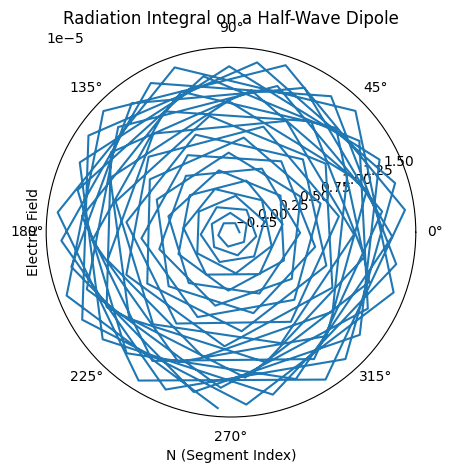

In [ ]:
# Radiation integral
r = 50
theta = 45
f_theta = sum(c*(np.exp(1j*k*z)+np.exp(1j*k*z))*dz)
E = 1j*k*eta*np.exp(-1j*k*r)/(4*np.pi*r) * f_theta
plt.polar(N,E)
plt.xlabel('N (Segment Index)')
plt.ylabel('Electric Field')
plt.title('Radiation Integral on a Half-Wave Dipole')
plt.grid()
plt.show()
plt.show()

3. Compute the input impedance as a function of electrical length using the moment method. Plot both the real and
imaginary parts. Add to the plot the radiation resistance from the sinusoidal current model. Set the range of axes
sensibly so that important features of the curves are visible.
Using equation 3.37 the input impedance is solved for and plotted.

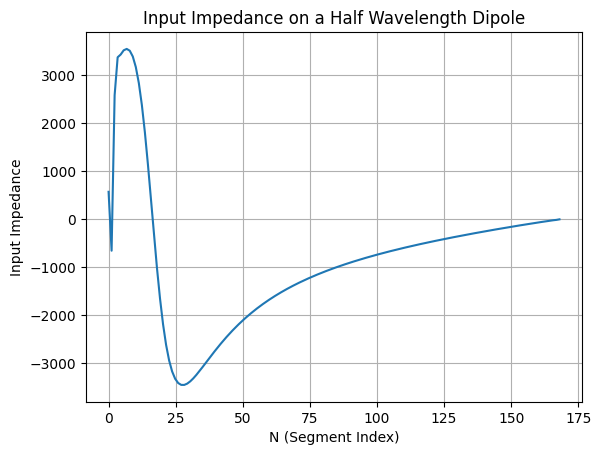

In [4]:
# Calculate input impedance Zin
Zin = Vi / c
# plot
plt.plot(N,Zin)
plt.xlabel('N (Segment Index)')
plt.ylabel('Input Impedance')
plt.title('Input Impedance on a Half Wavelength Dipole')
plt.grid()
plt.show()
plt.show()